## Helping visually impaired people navigate public and private spaces better

The idea is to potentially point a camera at an object and have it get classified/identified into ten distinct objects. Considering for now that the category of "everything else" is dealt with by different means, the model will be trained and tested to identify the following ten items:-

1. Architectural Heritage Elements
2. Indian Currency Notes
3. Braille (detection of braille on areas like signboards, paper, etc.)
4. Stairs
5. Dogs
6. Traffic sign boards (possibly next step could be parsing the text on them)
7. Mouse
8. Keyboard
9. Phones
10. Vehicles

I have curated these after some discussion and selective filtering based on what my other classmates are doing. I believe my agenda is to identify some more niche pain points which aren't addressed by my peers, such as currency notes which can be felt but not seen by blind people; especially when they haven't been blind since birth. I am also acknowledging the opportunity that tourism and public space design has with respect to accessibility for visually impaired people.

Images are pulled from various datasets, preprocessed, and then input to the model for training. Thereafter, the model is tested to determine accuracy of identification.

In [8]:
#importing all reqd. libraries
    
import tensorflow as tf

import cv2
import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import os
from os import listdir
from PIL import Image as PImage

import PIL
#from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [9]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = "/path/to/your/images/"

# your images in an array
imgs = loadImages(path)

for img in imgs:
    # you can show every image
    img.show()
    

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/images/'

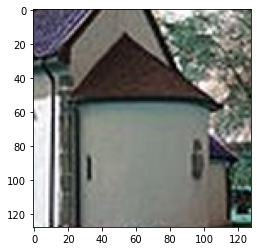

In [11]:
# testing command to show image

image = cv2.imread('/Users/WSD/Datasets/Architectural_Heritage_Elements_Dataset_128(creative_commons)/apse/79px-檚tra_Gerums_kyrka_Sweden_03.jpg')
plt.imshow(image)
plt.show()

In [ ]:

import os, sys
path = "path"
dirs = os.listdir( path )
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            img = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            img = img.resize((width,hight ), Image.ANTIALIAS)
            img.save(f + '.jpg') 
resize()

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation=’relu’))
model.add(Flatten())
model.add(Dense(10, activation=’softmax’))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])